In [188]:
import pandas as pd              # For data manipulation and analysis
import numpy as np               # For numerical operations
import matplotlib.pyplot as plt  # For creating visualizations
import seaborn as sns           # For statistical data visualization
import warnings                 # For handling warning messages

# Suppress warning messages for cleaner output
warnings.filterwarnings('ignore')


# CONFIGURE VISUALIZATION SETTINGS

# Set the default style for all plots to 'whitegrid' for better readability
sns.set_style('whitegrid')

# Set default figure size for all plots (width=12 inches, height=6 inches)
plt.rcParams['figure.figsize'] = (12, 6)

In [189]:
# print header
print("="*80)
print("LOAN PREDICTION USING MACHINE LEARNING")
print("="*80)

LOAN PREDICTION USING MACHINE LEARNING


In [249]:
# Load CSV file
df = pd.read_csv("data/loan-dataset.csv")

In [295]:
df = df.drop(columns=['loan_id'])

In [296]:
df.columns = df.columns.str.lower().str.replace('-', '_')
print(df.columns)

Index(['female', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')


In [297]:
df['loan_amount_term'] = df['loan_amount_term'] /10

In [298]:
# Check first 5 rows
df.head()

,female,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
0,Male,0,0,Graduate,0,5849.0,0.0,454.0,3.6,1,Urban,1
1,Male,1,1,Graduate,0,4583.0,1508.0,128.0,3.6,1,Rural,0
2,Male,1,0,Graduate,1,3000.0,0.0,66.0,3.6,1,Urban,1
3,Male,1,0,Not Graduate,0,2583.0,2358.0,120.0,3.6,1,Urban,1
4,Male,0,0,Graduate,0,6000.0,0.0,141.0,3.6,1,Urban,1


In [299]:
print(df.columns.tolist())

['female', 'married', 'dependents', 'education', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'property_area', 'loan_status']


In [300]:
# Check column names
df.columns

Index(['female', 'married', 'dependents', 'education', 'self_employed',
       'applicantincome', 'coapplicantincome', 'loanamount',
       'loan_amount_term', 'credit_history', 'property_area', 'loan_status'],
      dtype='object')

In [301]:
# Info about columns, data types, and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   female             614 non-null    object 
 1   married            614 non-null    int64  
 2   dependents         614 non-null    int64  
 3   education          614 non-null    object 
 4   self_employed      614 non-null    int64  
 5   applicantincome    614 non-null    float64
 6   coapplicantincome  614 non-null    float64
 7   loanamount         614 non-null    float64
 8   loan_amount_term   614 non-null    float64
 9   credit_history     614 non-null    int64  
 10  property_area      614 non-null    object 
 11  loan_status        614 non-null    int64  
dtypes: float64(4), int64(5), object(3)
memory usage: 57.7+ KB


In [302]:
# Count of null values in each column
df.isnull().sum()

female               0
married              0
dependents           0
education            0
self_employed        0
applicantincome      0
coapplicantincome    0
loanamount           0
loan_amount_term     0
credit_history       0
property_area        0
loan_status          0
dtype: int64

In [304]:
#get mean, median, min, max
df.describe()

,married,dependents,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,loan_status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.649837,0.785016,0.177524,5403.459283,1623.971987,157.226384,3.379479,0.827362,0.687296
std,0.477410,1.021484,0.382423,6109.041673,2925.530175,117.933370,0.704423,0.378243,0.463973
min,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,0.120000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,2877.500000,0.000000,101.250000,3.600000,1.000000,0.000000
50%,1.000000,0.000000,0.000000,3812.500000,1211.500000,129.000000,3.600000,1.000000,1.000000
75%,1.000000,2.000000,0.000000,5795.000000,2297.250000,172.000000,3.600000,1.000000,1.000000
max,1.000000,3.000000,1.000000,81000.000000,41667.000000,960.000000,4.800000,1.000000,1.000000


In [305]:
df.dtypes

female                object
married                int64
dependents             int64
education             object
self_employed          int64
applicantincome      float64
coapplicantincome    float64
loanamount           float64
loan_amount_term     float64
credit_history         int64
property_area         object
loan_status            int64
dtype: object

In [306]:
df.describe(include='all')

,female,married,dependents,education,self_employed,applicantincome,coapplicantincome,loanamount,loan_amount_term,credit_history,property_area,loan_status
count,614,614.000000,614.000000,614,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614,614.000000
unique,2,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN
top,Male,NaN,NaN,Graduate,NaN,NaN,NaN,NaN,NaN,NaN,Semiurban,NaN
freq,489,NaN,NaN,480,NaN,NaN,NaN,NaN,NaN,NaN,233,NaN
mean,NaN,0.649837,0.785016,NaN,0.177524,5403.459283,1623.971987,157.226384,3.379479,0.827362,NaN,0.687296
std,NaN,0.477410,1.021484,NaN,0.382423,6109.041673,2925.530175,117.933370,0.704423,0.378243,NaN,0.463973
min,NaN,0.000000,0.000000,NaN,0.000000,150.000000,0.000000,9.000000,0.120000,0.000000,NaN,0.000000
25%,NaN,0.000000,0.000000,NaN,0.000000,2877.500000,0.000000,101.250000,3.600000,1.000000,NaN,0.000000
50%,NaN,1.000000,0.000000,NaN,0.000000,3812.500000,1211.500000,129.000000,3.600000,1.000000,NaN,1.000000
75%,NaN,1.000000,2.000000,NaN,0.000000,5795.000000,2297.250000,172.000000,3.600000,1.000000,NaN,1.000000


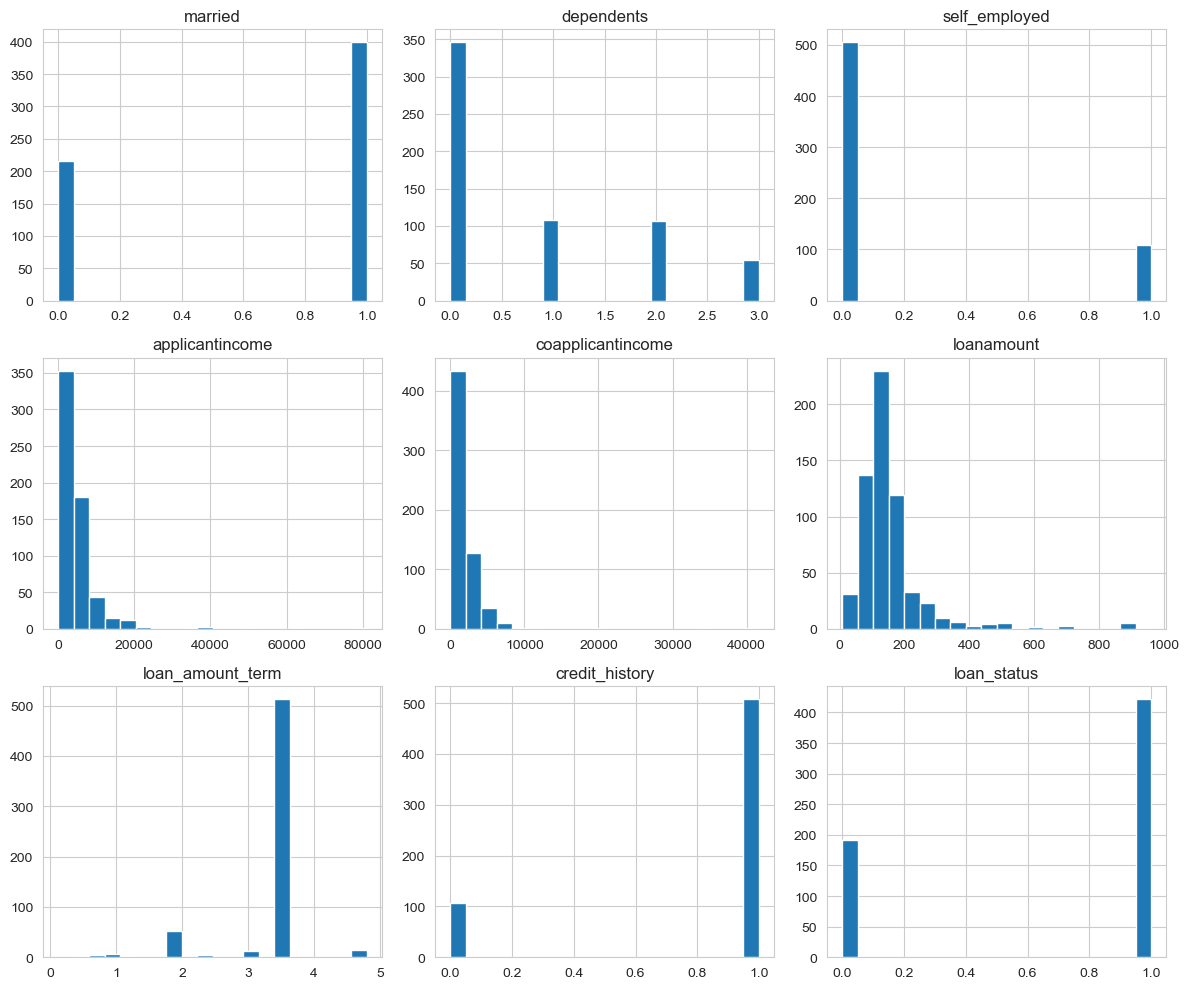

In [307]:
# Distribution of numerical features
import matplotlib.pyplot as plt

# Histogram for all numeric columns
df.hist(figsize=(12,10), bins=20)
plt.tight_layout()
plt.show()

In [308]:
# Categorical features
# Count of each category
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print("\n")

female
Male      489
Female    125
Name: count, dtype: int64


education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


property_area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64




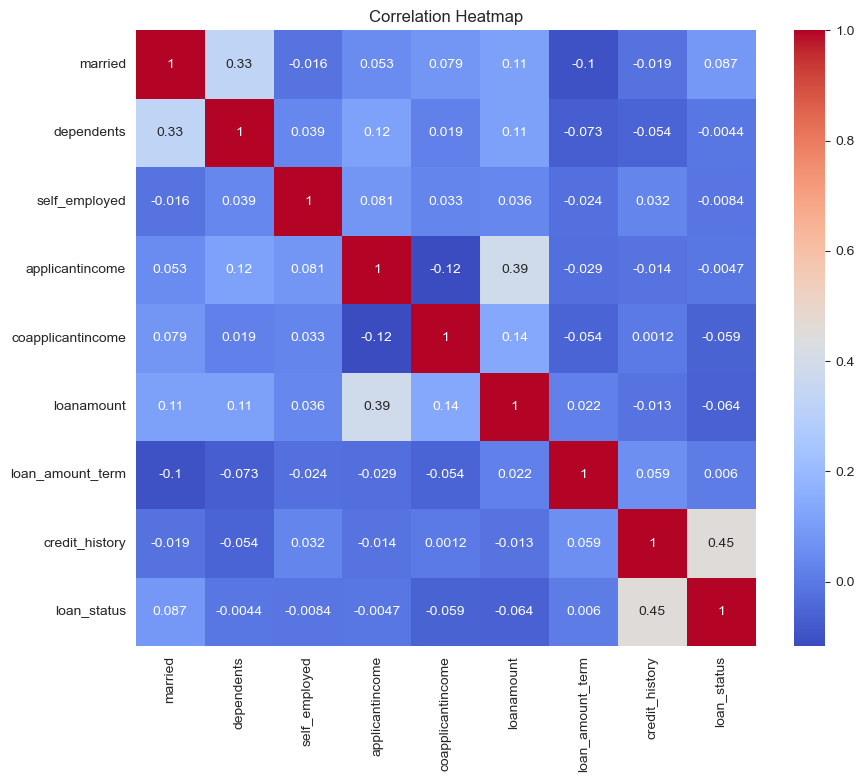

In [309]:
#visualizes the Pearson correlation coefficient, which measures the strength and direction of linear relationships between pairs of variables.

#correlation heatmap, 

# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Now compute correlation
corr = numeric_df.corr()

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [310]:
import pandas as pd

# Separate target
y = df['loan_status']
X = df.drop('loan_status', axis=1)

# One-hot encode categorical variables
X = pd.get_dummies(X, drop_first=True)

# Check shape
print(X.shape)

(614, 12)


In [311]:
# One-hot encoding
# 1. Manually redefine cat_cols WITHOUT 'Loan_ID'
cat_cols = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']

# 2. OR dynamically remove it if you're not sure about the spelling:
cat_cols = [col for col in cat_cols if col in df.columns]

# 3. Now this will work:
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [312]:
# Run this first to see which columns are still strings
print(X_train.dtypes)
print(X_train.select_dtypes(include='object').columns.tolist())

married                      int64
dependents                   int64
self_employed                int64
applicantincome            float64
coapplicantincome          float64
                            ...   
loan_id_LP002990              bool
female_Male                   bool
education_Not Graduate        bool
property_area_Semiurban       bool
property_area_Urban           bool
Length: 625, dtype: object
[]


In [313]:
#Split data to training and test set
from sklearn.model_selection import train_test_split

# Train-test split (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)



X_train shape: (429, 12)
X_test shape : (185, 12)


In [314]:
#Model building
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [315]:
# Check shapes
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (429, 12)
X_test shape: (185, 12)
y_train shape: (429,)
y_test shape: (185,)


In [316]:
#penalize mistakes on rejections.
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

# Initialize the model
lr.fit(X_train, y_train)

# 2. FIT THE MODEL (This is the missing step!)
lr.fit(X_train, y_train)

# Train the model on training data
lr.fit(X_train, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,'balanced'
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [317]:
# STEP 4: Apply threshold
y_pred_final = (y_probs > 0.43).astype(int)

# Evaluate
print("="*70)
print("         FINAL MODEL")
print("="*70)
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))

         FINAL MODEL

Confusion Matrix:
[[ 37  21]
 [ 14 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68        58
           1       0.84      0.89      0.87       127

    accuracy                           0.81       185
   macro avg       0.78      0.76      0.77       185
weighted avg       0.81      0.81      0.81       185



In [318]:
#Make predictions
# Predict on the test set
y_pred = lr.predict(X_test)

In [319]:
# Predict on test dataset
y_pred = lr.predict(X_test)

# Compare first 5 predictions with actual values
import pandas as pd

pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
}).head()

,Actual,Predicted
0,1,1
1,1,1
2,1,1
3,1,1
4,1,0


In [320]:
# 1. Train the model
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(max_iter=1000, class_weight='balanced')
lr.fit(X_train, y_train)

# 2. Verify it exists immediately
if hasattr(lr, 'coef_'):
    print("Success! Model is fitted.")
    
    # 3. Create the DataFrame
    coef_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Coefficient': lr.coef_[0]
    }).sort_values('Coefficient', ascending=True)

    # ... [Rest of your plotting code here] ...
    
    # Show the top 5 for immediate confirmation
    print(coef_df.tail(5))
else:
    print("The model still isn't fitting. Check if X_train is empty.")

Success! Model is fitted.
                    Feature  Coefficient
1                dependents     0.093700
11      property_area_Urban     0.095968
0                   married     0.544526
10  property_area_Semiurban     0.602090
7            credit_history     2.120119


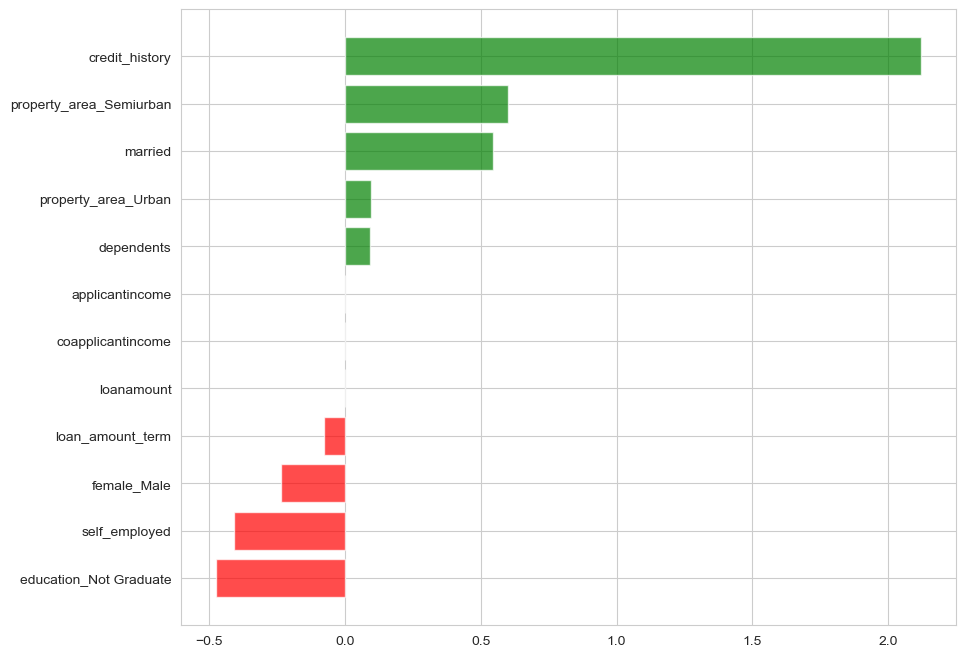

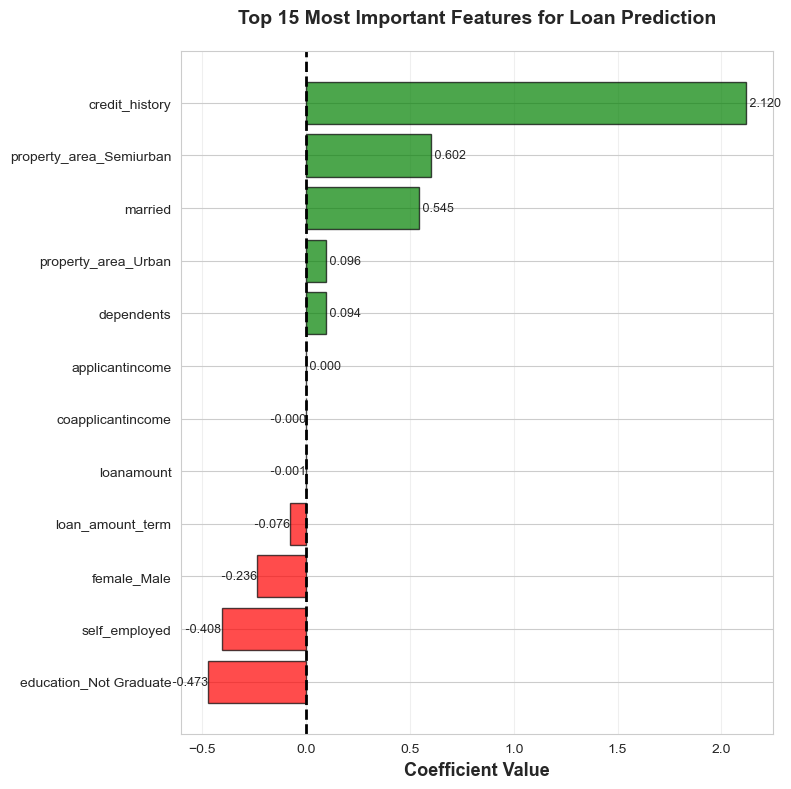


FEATURE IMPORTANCE SUMMARY

Top 5 Features INCREASING Loan Approval (Positive Impact):
                    Feature  Coefficient  abs_coef
1                dependents     0.093700  0.093700
11      property_area_Urban     0.095968  0.095968
0                   married     0.544526  0.544526
10  property_area_Semiurban     0.602090  0.602090
7            credit_history     2.120119  2.120119


Top 5 Features DECREASING Loan Approval (Negative Impact):
                  Feature  Coefficient  abs_coef
9  education_Not Graduate    -0.472516  0.472516
2           self_employed    -0.408025  0.408025
8             female_Male    -0.236337  0.236337
6        loan_amount_term    -0.076117  0.076117
5              loanamount    -0.000905  0.000905


In [321]:
# Coefficient Plot (Most Important for Interpretation)
# Shows which features matter most and their direction
import pandas as pd
import matplotlib.pyplot as plt

# Get feature coefficients
coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': lr.coef_[0]
}).sort_values('Coefficient', ascending=True)

# Create figure with proper spacing
fig, ax = plt.subplots(figsize=(10, max(8, len(coef_df) * 0.3)))  # Dynamic height

# Create color map
colors = ['red' if x < 0 else 'green' for x in coef_df['Coefficient']]

# Plot horizontal bar chart
ax.barh(range(len(coef_df)), coef_df['Coefficient'], color=colors, alpha=0.7)

# Set y-axis labels with proper spacing
ax.set_yticks(range(len(coef_df)))
ax.set_yticklabels(coef_df['Feature'], fontsize=10)

# Show only top 15 most impactful features
coef_df['abs_coef'] = coef_df['Coefficient'].abs()
top_15 = coef_df.nlargest(15, 'abs_coef').sort_values('Coefficient')

fig, ax = plt.subplots(figsize=(8, 8))

colors = ['red' if x < 0 else 'green' for x in top_15['Coefficient']]
bars = ax.barh(top_15['Feature'], top_15['Coefficient'], color=colors, alpha=0.7, edgecolor='black')

ax.set_xlabel('Coefficient Value', fontsize=13, fontweight='bold')
ax.set_title('Top 15 Most Important Features for Loan Prediction', 
             fontsize=14, fontweight='bold', pad=20)
ax.axvline(x=0, color='black', linestyle='--', linewidth=2)
ax.grid(axis='x', alpha=0.3)

# Add value labels on bars
for i, (bar, val) in enumerate(zip(bars, top_15['Coefficient'])):
    ax.text(val, bar.get_y() + bar.get_height()/2, 
            f' {val:.3f}', va='center', fontsize=9,
            ha='left' if val > 0 else 'right')

plt.tight_layout()
plt.show()

# Print numerical summary
print("\n" + "="*60)
print("FEATURE IMPORTANCE SUMMARY")
print("="*60)
print("\nTop 5 Features INCREASING Loan Approval (Positive Impact):")
print(coef_df.tail(5).to_string())

print("\n\nTop 5 Features DECREASING Loan Approval (Negative Impact):")
print(coef_df.head(5).to_string())
# Interpretation: 
# Positive = increases loan approval probability
# Negative = decreases loan approval probability

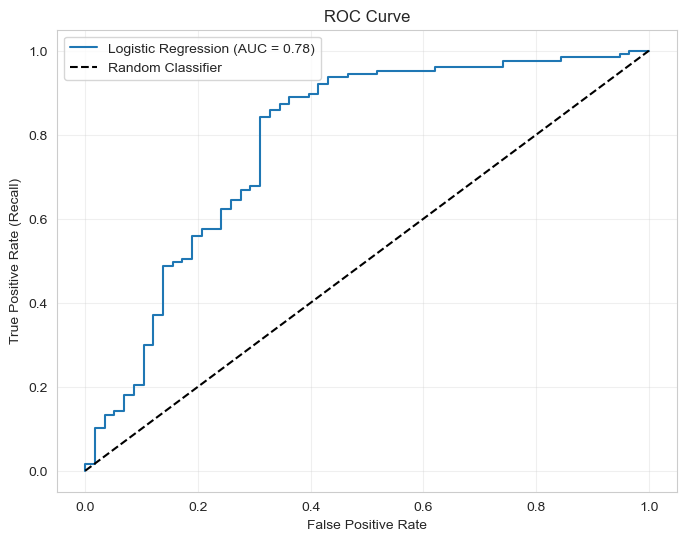

In [288]:
#ROC Curve (Model Performance)
#Shows trade-off between catching defaults vs false alarms
from sklearn.metrics import roc_curve, roc_auc_score

y_probs = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


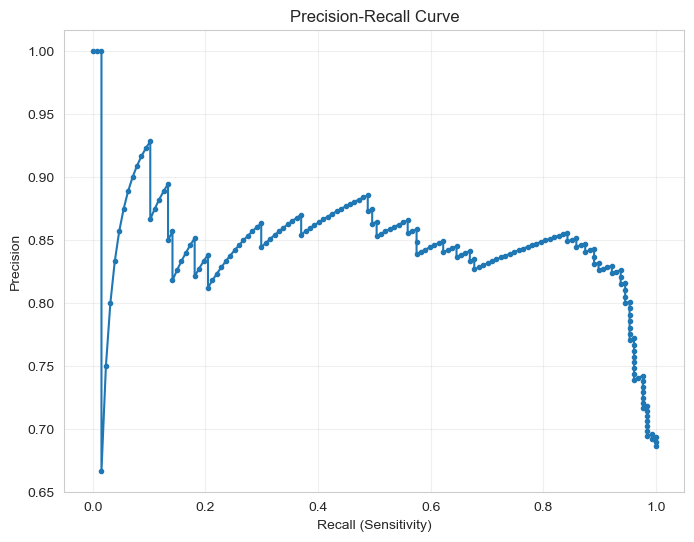

In [322]:
#Precision-Recall Curve (Better for Imbalanced Data)
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')

plt.title('Precision-Recall Curve')
plt.grid(alpha=0.3)
plt.show()

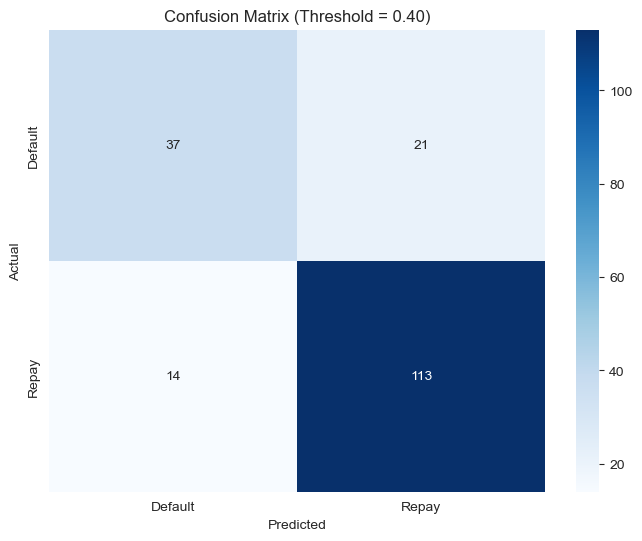

In [324]:
# Confusion Matrix Heatmap
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_final)  # ← Changed this line!

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Default', 'Repay'],
            yticklabels=['Default', 'Repay'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix (Threshold = 0.40)')  # Updated title
plt.show()

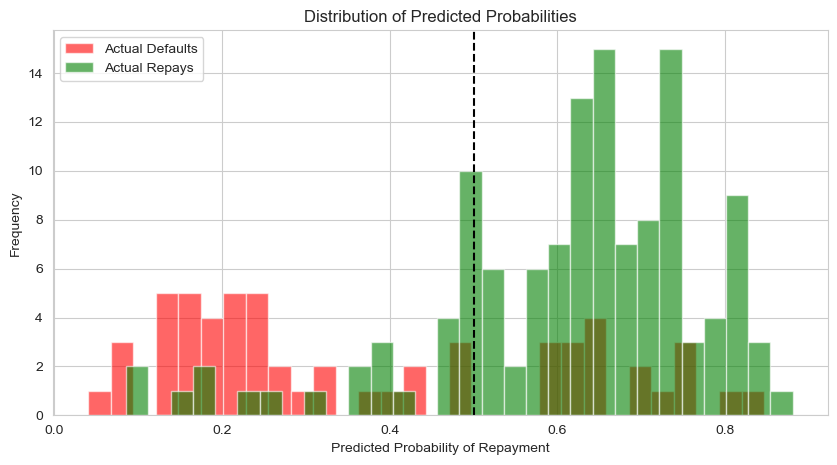

In [325]:
# Probability Distribution (Risk Segmentation)
plt.figure(figsize=(10, 5))
plt.hist(y_probs[y_test == 0], bins=30, alpha=0.6, label='Actual Defaults', color='red')
plt.hist(y_probs[y_test == 1], bins=30, alpha=0.6, label='Actual Repays', color='green')
plt.xlabel('Predicted Probability of Repayment')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.axvline(x=0.5, color='black', linestyle='--', label='Default Threshold')
plt.show()

In [293]:
print(X_train.columns.tolist())

['married', 'dependents', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'loan_id_LP001003', 'loan_id_LP001005', 'loan_id_LP001006', 'loan_id_LP001008', 'loan_id_LP001011', 'loan_id_LP001013', 'loan_id_LP001014', 'loan_id_LP001018', 'loan_id_LP001020', 'loan_id_LP001024', 'loan_id_LP001027', 'loan_id_LP001028', 'loan_id_LP001029', 'loan_id_LP001030', 'loan_id_LP001032', 'loan_id_LP001034', 'loan_id_LP001036', 'loan_id_LP001038', 'loan_id_LP001041', 'loan_id_LP001043', 'loan_id_LP001046', 'loan_id_LP001047', 'loan_id_LP001050', 'loan_id_LP001052', 'loan_id_LP001066', 'loan_id_LP001068', 'loan_id_LP001073', 'loan_id_LP001086', 'loan_id_LP001087', 'loan_id_LP001091', 'loan_id_LP001095', 'loan_id_LP001097', 'loan_id_LP001098', 'loan_id_LP001100', 'loan_id_LP001106', 'loan_id_LP001109', 'loan_id_LP001112', 'loan_id_LP001114', 'loan_id_LP001116', 'loan_id_LP001119', 'loan_id_LP001120', 'loan_id_LP001123', 'loan_id_LP001131', 'loan

In [328]:
# Test Case 1: High-risk
high_risk = pd.DataFrame({
    'female_Male':           [1],   # Male
    'married':               [0],   # Single
    'dependents':            [0],
    'education_Not Graduate': [1],  # Not Graduate
    'self_employed':         [1],
    'applicantincome':       [2000],
    'coapplicantincome':     [0],
    'loanamount':            [200],
    'loan_amount_term':      [36],
    'credit_history':        [0],
    'property_area_Semiurban': [0],
    'property_area_Urban':     [0]  # Rural = both 0
})

# Test Case 2: Low-risk
low_risk = pd.DataFrame({
    'female_Male':           [1],
    'married':               [1],
    'dependents':            [1],
    'education_Not Graduate': [0],  # Graduate
    'self_employed':         [0],
    'applicantincome':       [8000],
    'coapplicantincome':     [3000],
    'loanamount':            [150],
    'loan_amount_term':      [24],
    'credit_history':        [1],
    'property_area_Semiurban': [1],
    'property_area_Urban':     [0]
})

# Test Case 3: Medium-risk
medium_risk = pd.DataFrame({
    'female_Male':           [0],   # Female
    'married':               [1],
    'dependents':            [2],
    'education_Not Graduate': [0],  # Graduate
    'self_employed':         [0],
    'applicantincome':       [4000],
    'coapplicantincome':     [1500],
    'loanamount':            [180],
    'loan_amount_term':      [12],
    'credit_history':        [1],
    'property_area_Semiurban': [0],
    'property_area_Urban':     [1]
})

In [178]:
# Test model stability across different data splits:

from sklearn.model_selection import cross_validate

# Use your existing X and y from the train-test split preparation
# Combine them back temporarily for cross-validation
X_full = pd.concat([X_train, X_test])
y_full = pd.concat([y_train, y_test])

print(f"Full dataset shape: {X_full.shape}\n")

# 5-Fold Cross-Validation
lr_cv = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)

cv_results = cross_validate(
    lr_cv, X_full, y_full, 
    cv=5,
    scoring=['accuracy', 'precision', 'recall', 'f1'],
    return_train_score=True
)

print("="*70)
print("5-FOLD CROSS-VALIDATION RESULTS")
print("="*70)
print(f"\nAccuracy:  {cv_results['test_accuracy'].mean():.2%} (+/- {cv_results['test_accuracy'].std()*2:.2%})")
print(f"Precision: {cv_results['test_precision'].mean():.2%} (+/- {cv_results['test_precision'].std()*2:.2%})")
print(f"Recall:    {cv_results['test_recall'].mean():.2%} (+/- {cv_results['test_recall'].std()*2:.2%})")
print(f"F1-Score:  {cv_results['test_f1'].mean():.2%} (+/- {cv_results['test_f1'].std()*2:.2%})")

print("\n📊 Individual Fold Scores:")
for i in range(5):
    print(f"Fold {i+1}: Accuracy = {cv_results['test_accuracy'][i]:.2%}")

print(f"\n🔍 Overfitting Check:")
print(f"Train Accuracy: {cv_results['train_accuracy'].mean():.2%}")
print(f"Test Accuracy:  {cv_results['test_accuracy'].mean():.2%}")
print(f"Difference:     {(cv_results['train_accuracy'].mean() - cv_results['test_accuracy'].mean())*100:.1f}%")

if cv_results['train_accuracy'].mean() - cv_results['test_accuracy'].mean() < 0.05:
    print("✅ Model generalizes well (no significant overfitting)")
else:
    print("⚠️ Possible overfitting detected")

Full dataset shape: (614, 11)

5-FOLD CROSS-VALIDATION RESULTS

Accuracy:  72.81% (+/- 5.96%)
Precision: 78.56% (+/- 6.72%)
Recall:    83.40% (+/- 6.66%)
F1-Score:  80.82% (+/- 4.09%)

📊 Individual Fold Scores:
Fold 1: Accuracy = 71.54%
Fold 2: Accuracy = 76.42%
Fold 3: Accuracy = 69.11%
Fold 4: Accuracy = 70.73%
Fold 5: Accuracy = 76.23%

🔍 Overfitting Check:
Train Accuracy: 76.06%
Test Accuracy:  72.81%
Difference:     3.3%
✅ Model generalizes well (no significant overfitting)


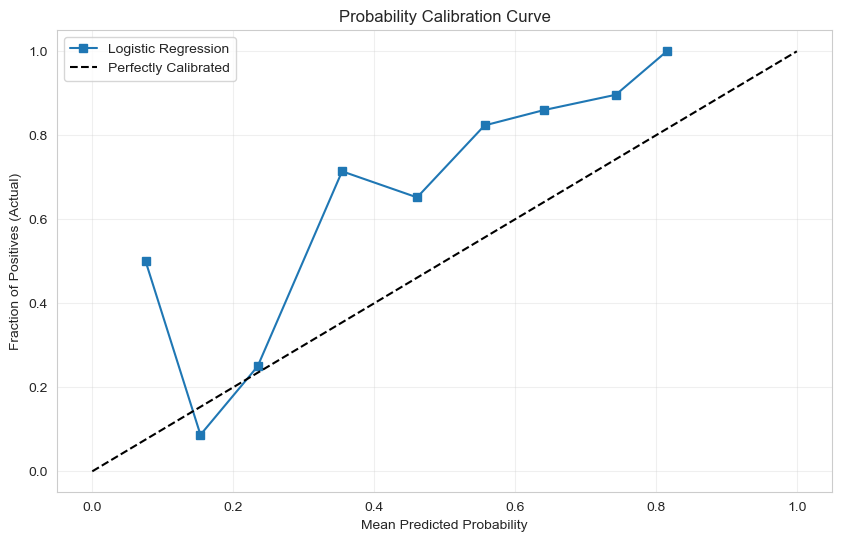


📊 Interpretation:
If the line follows the diagonal closely, probabilities are well-calibrated.
If it's above: Model is underconfident
If it's below: Model is overconfident


In [330]:
# Probability Calibration Check

from sklearn.calibration import calibration_curve
import matplotlib.pyplot as plt

# Get probabilities
y_probs = lr.predict_proba(X_test)[:, 1]

# Calculate calibration
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_test, y_probs, n_bins=10, strategy='uniform'
)

# Plot
plt.figure(figsize=(10, 6))
plt.plot(mean_predicted_value, fraction_of_positives, 's-', label='Logistic Regression')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives (Actual)')
plt.title('Probability Calibration Curve')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

print("\n📊 Interpretation:")
print("If the line follows the diagonal closely, probabilities are well-calibrated.")
print("If it's above: Model is underconfident")
print("If it's below: Model is overconfident")

In [331]:
import os
os.getcwd()

'C:\\Users\\stacy\\loan-prediction-ml'

In [332]:
import os

os.makedirs("data", exist_ok=True)
os.makedirs("model", exist_ok=True)

os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'app.py',
 'data',
 'model',
 'README.md',
 'requirements.txt',
 'runtime.txt',
 'train_model.ipynb']

In [340]:
import joblib
import os

# Save the model (use 'lr' instead of 'model')
joblib.dump(lr, "model/model.pkl")

# List files in the model directory to verify
os.listdir("model")



['loan_model.pkl', 'model.pkl']

In [341]:
import os
os.listdir()

['.git',
 '.gitignore',
 '.ipynb_checkpoints',
 'app.py',
 'data',
 'model',
 'README.md',
 'requirements.txt',
 'runtime.txt',
 'train_model.ipynb']

In [337]:
import os
os.getcwd()

'C:\\Users\\stacy\\loan-prediction-ml'

In [185]:
X_train.columns.tolist()

['female',
 'married',
 'dependents',
 'education',
 'self_employed',
 'applicantincome',
 'coapplicantincome',
 'loanamount',
 'loan_amount_term',
 'credit_history',
 'property_area']

In [342]:
import joblib

model1 = joblib.load("model/loan_model.pkl")
model2 = joblib.load("model/model.pkl")

print("loan_model.pkl:", model1)
print("model.pkl:", model2)

loan_model.pkl: LogisticRegression(class_weight='balanced', max_iter=1000)
model.pkl: LogisticRegression(class_weight='balanced', max_iter=1000)


In [343]:
import numpy as np
same = np.array_equal(model1.coef_, model2.coef_)
print("Are they the same model?", same)

Are they the same model? True


In [346]:
import os
os.remove("model/model.pkl")

In [348]:
print(list(lr.feature_names_in_))

['married', 'dependents', 'self_employed', 'applicantincome', 'coapplicantincome', 'loanamount', 'loan_amount_term', 'credit_history', 'female_Male', 'education_Not Graduate', 'property_area_Semiurban', 'property_area_Urban']


In [349]:
# See approved loans in your dataset
approved = df[df['loan_status'] == 1].describe()
print(approved)

          married  dependents  self_employed  applicantincome  \
count  422.000000  422.000000     422.000000       422.000000   
mean     0.677725    0.781991       0.175355      5384.068720   
std      0.467902    1.015256       0.380722      5765.441615   
min      0.000000    0.000000       0.000000       210.000000   
25%      0.000000    0.000000       0.000000      2877.500000   
50%      1.000000    0.000000       0.000000      3812.500000   
75%      1.000000    2.000000       0.000000      5771.500000   
max      1.000000    3.000000       1.000000     63337.000000   

       coapplicantincome  loanamount  loan_amount_term  credit_history  \
count         422.000000  422.000000        422.000000      422.000000   
mean         1508.482938  152.172986          3.382322        0.943128   
std          1923.404573  109.094528          0.666072        0.231873   
min             0.000000   17.000000          0.120000        0.000000   
25%             0.000000  100.250000        